# Solar Flare Detection with Convolutional Neural Network 

The purpose of this project is to automatize the observation and the detection of solar flares from raw images available online. 

## 0. Importing modules and libraries:

In [7]:
import keras 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import requests 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
import os
import numpy as np
from PIL import Image
import random
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]
from keras.optimizers import SGD


In [8]:
from selenium import webdriver
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from nltk.tokenize import sent_tokenize, word_tokenize 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
from ann_visualizer.visualize import ann_viz


In [9]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 
from matplotlib import cm
import math 
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

## 1. Data extraction and exploration

As it has already been said, data are available in an open source manner. Nevertheless, it has been necessary to use some scraping techniques to automatize data extraction and labelling. 

Data have been extracted from the two following sources:
* https://www.spaceweatherlive.com/ - An online site that, day by day, furnishes a report of the solar activiy
* ftp://ftp.bbso.njit.edu/pub/archive/ - An online archive that, day by day, furnishes periodically scanned image of the sun

The first step is based on detecting the full calendar of solar flares, 2019, 2018 and 2013 calendars have been obtained from __Space Weather__.
In the following lines, the working code for 2019 have been displayed. 

In [5]:
year=2019
MONTHS=[]
months_number=[]
for i in range(1,13):
    if i<10:
        MONTHS.append('0%s/'%(i))
        months_number.append('0'+str(i))
    else:
        MONTHS.append('%s/'%(i))
        months_number.append(str(i))
twentyeight_day=[]
twentyeight_day_number=[]
for i in range(1,29):
    if i<10:
        twentyeight_day_number.append('0'+str(i))
        twentyeight_day.append('0%s/'%(i))
    else:
        twentyeight_day_number.append(str(i))
        twentyeight_day.append('%s/'%(i))
thirty_day=[]
thirty_day_number=[]
for i in range(1,31):
    
    if i<10:
        thirty_day.append('0%s/'%(i))
        thirty_day_number.append('0'+str(i))
    else:
        thirty_day.append('%s/'%(i))
        thirty_day_number.append(str(i))
thirtyone_day=[]
thirtyone_day_number=[]
for i in range(1,32):
    if i<10:
        thirtyone_day.append('0%s/'%(i))
        thirtyone_day_number.append('0'+str(i))
    else:
        thirtyone_day.append('%s/'%(i))
        thirtyone_day_number.append(str(i))
DAYS=[thirtyone_day,twentyeight_day,thirtyone_day,thirty_day,thirtyone_day,thirty_day,thirtyone_day,thirtyone_day,thirty_day,
     thirtyone_day,thirty_day,thirtyone_day]
DAYS_NUMBER=[thirtyone_day_number,twentyeight_day_number,thirtyone_day_number,thirty_day_number,thirtyone_day_number,thirty_day_number,thirtyone_day_number,thirtyone_day_number,thirty_day_number,
     thirtyone_day_number,thirty_day_number,thirtyone_day_number]

In [15]:
path='/Users/pierohmd/Desktop/University/Magistral/To do tests/Neural Networks Sun/chromedriver'

In [100]:
CONTENT=[]
driver = webdriver.Chrome(path)# Go to your page url
driver.get('https://www.spaceweatherlive.com/en/archive/2019/01/01/xray')

time.sleep(4)
content=driver.find_element_by_xpath('//*[@id="Archive_SolarFlare_table"]/table[2]').text
CONTENT.append(content)
for i in range(len(months_number)):
    for j in range(len(DAYS_NUMBER[i])):
        driver.get('https://www.spaceweatherlive.com/en/archive/2019/'+months_number[i]+'/'+DAYS_NUMBER[i][j]+'/'+'xray')
        element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'Archive_SolarFlare_table')))

        content=driver.find_element_by_id('Archive_SolarFlare_table').text
        
        time.sleep(4)
        CONTENT.append(content)
        print('Scraping done for %s/%s/%s'%(year,months_number[i],DAYS_NUMBER[i][j]))

Scraping done for 2019/01/01
Scraping done for 2019/01/02
Scraping done for 2019/01/03
Scraping done for 2019/01/04
Scraping done for 2019/01/05
Scraping done for 2019/01/06
Scraping done for 2019/01/07
Scraping done for 2019/01/08
Scraping done for 2019/01/09
Scraping done for 2019/01/10
Scraping done for 2019/01/11
Scraping done for 2019/01/12
Scraping done for 2019/01/13
Scraping done for 2019/01/14
Scraping done for 2019/01/15
Scraping done for 2019/01/16
Scraping done for 2019/01/17
Scraping done for 2019/01/18
Scraping done for 2019/01/19
Scraping done for 2019/01/20
Scraping done for 2019/01/21
Scraping done for 2019/01/22
Scraping done for 2019/01/23
Scraping done for 2019/01/24
Scraping done for 2019/01/25
Scraping done for 2019/01/26
Scraping done for 2019/01/27
Scraping done for 2019/01/28
Scraping done for 2019/01/29
Scraping done for 2019/01/30
Scraping done for 2019/01/31
Scraping done for 2019/02/01
Scraping done for 2019/02/02
Scraping done for 2019/02/03
Scraping done 

TimeoutException: Message: 


The security system of the site I was scraping blocked me, so I was obliged to use the same script on another jupyter notebook, the result has been stored in the following list:

In [239]:
CONTENT=CONTENT+REMAIN_CONTENT

In [241]:
del CONTENT[0]

In [248]:
f = open("solarflarecalendar.txt", "a")
for c in CONTENT:
    f.write(c)
f.close()

In [422]:
TOK_CONTENT=[]
for c in CONTENT:
    TOK_CONTENT.append((word_tokenize(c)))
NEW_TOK_CONTENT=[]
for data in TOK_CONTENT:
    try:
        start=data.index('End')
        new_data=[]
        for i in range(start+1,len(data)):
            new_data.append(data[i])
        NEW_TOK_CONTENT.append(new_data)
    except:
        NEW_TOK_CONTENT.append(['Not available'])

In [424]:
def isSolarFlare(event_list):
    issolarflare=[]
    for e in event_list:
        if e[0]=='None' or e[0]=='Not available':
            issolarflare.append(0)
        else:
            issolarflare.append(1)
            
        
    return issolarflare

In [425]:
month_data=[]
for i in range(len(DAYS_NUMBER)):
    for j in range(len(DAYS_NUMBER[i])):
        month_data.append('%s'%(i+1))

In [426]:
day_data=[]
for i in range(len(DAYS_NUMBER)):
    for j in range(len(DAYS_NUMBER[i])):
        day_data.append(DAYS_NUMBER[i][j])

In [449]:
date=[]
for m in range(len(months_number)):
    for d in range(len(DAYS_NUMBER[m])):
        date.append('2019'+'/'+ months_number[m]+ '/' + DAYS_NUMBER[m][d])

In [450]:
label_data=pd.DataFrame()
label_data['Date']=date
label_data['Month']=month_data
label_data['Day']=day_data
label_data['Solar Flare Event']=isSolarFlare(NEW_TOK_CONTENT)

In this way we know if we have or not a Solar Flare on that day of 2019.

In [451]:
label_data.to_csv('Solarflarevent.csv')

In [88]:
solarflares=label_data[label_data['Solar Flare Event']==1].index.tolist()
SOLAR_FLARE_TOK=[]
for i in solarflares:
    SOLAR_FLARE_TOK.append(NEW_TOK_CONTENT[i])

NameError: name 'NEW_TOK_CONTENT' is not defined

In [432]:
SOLAR_FLARE_H=[]

for event in SOLAR_FLARE_TOK:
    hour_day=[]
    for element in event:
        hour=[]
        for character in element:
            if character==':':
                hour.append(element)
        hour_day.append(hour)
    SOLAR_FLARE_H.append(hour_day)

In [433]:
NEW_SOLAR_FLARE_H=[]
for event in SOLAR_FLARE_H:
    flat_list = [item for sublist in event for item in sublist]
    NEW_SOLAR_FLARE_H.append(flat_list)



In [434]:
how_many=[]
for day in NEW_SOLAR_FLARE_H:
    how_many.append(int(len(day)/3))

In [447]:
date=[]
for m in range(len(months_number)):
    for d in range(len(DAYS_NUMBER[m])):
        date.append('2019'+'/'+ months_number[m]+ '/' + DAYS_NUMBER[m][d])
        

In [456]:
solarflare_date=label_data[label_data['Solar Flare Event']==1].Date.tolist()
new_solar_flare_date=[]
for h in range(len(how_many)):
    for i in range(how_many[h]):
        new_solar_flare_date.append(solarflare_date[h])

In [460]:
label_detailed_data=pd.DataFrame()
label_detailed_data['Date']=new_solar_flare_date

In [462]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

In [466]:
FINAL_SOLAR_FLARE_H=[]
for i in range(len(NEW_SOLAR_FLARE_H)):
    FINAL_SOLAR_FLARE_H.append(chunkIt(NEW_SOLAR_FLARE_H[i],how_many[i]))

In [472]:
START=[]
PEAK=[]
END=[]
for i in range(len(FINAL_SOLAR_FLARE_H)):
    for j in range(len(FINAL_SOLAR_FLARE_H[i])):
        START.append(FINAL_SOLAR_FLARE_H[i][j][0])
        PEAK.append(FINAL_SOLAR_FLARE_H[i][j][1])
        END.append(FINAL_SOLAR_FLARE_H[i][j][2])

In [477]:
label_detailed_data['Start']=START
label_detailed_data['Maximum']=PEAK
label_detailed_data['End']=END


In [479]:
label_detailed_data.to_csv('SolarFlareDetailedData.csv')

The full calendar of Solar Flare in 2019 has been collected in the following DataFrame:

In [7]:
label_detailed_data

,Date,Start,Maximum,End
0,2019/01/02,01:44,01:50,01:55
1,2019/01/02,18:32,18:38,18:44
2,2019/01/03,16:40,17:14,17:33
3,2019/01/04,11:04,11:35,11:46
4,2019/01/06,01:56,02:02,02:09
...,...,...,...,...
272,2019/11/25,23:18,23:22,23:23
273,2019/12/02,11:15,11:16,11:17
274,2019/12/13,08:20,08:21,08:22
275,2019/12/20,10:54,11:03,11:04


The following step is based on checking which image is available from the site n.1: __BBSO__. 

In [64]:
web_url='ftp://ftp.bbso.njit.edu/pub/archive/'
research_date=label_detailed_data.Date.drop_duplicates().tolist()

In [66]:
TOT_TIME_TOK=[]
for j in range(len(research_date)):
    driver=webdriver.Chrome(path)
    print('Scraping done for %s , another %i day missing' %(research_date[j],len(research_date)-(j+1)))
    driver.get(web_url+research_date[j])
    try:
        text=driver.find_element_by_xpath('//*[@id="tbody"]').text
        TOK=word_tokenize(text)
        NEW_TOK=[]
        for i in range(len(TOK)):
            counter=0
            for j in range(len(TOK[i])):
                if TOK[i][j]!='x':
                    counter=counter+1
            if counter!=len(TOK[i]):
                NEW_TOK.append(TOK[i])
        FINAL_TOK=[]
        for i in range(len(NEW_TOK)):
            LIST=NEW_TOK[i].split('.')
            if LIST[1]=='jpg':
                FINAL_TOK.append(LIST[0])
        HOUR_TOK=[]
        for i in range(len(FINAL_TOK)):
            LIST=FINAL_TOK[i].split('_')
            HOUR_TOK.append(LIST[len(LIST)-1])
        TIME_TOK=[]
        sep=':'
        for i in range(len(HOUR_TOK)):
            hour=HOUR_TOK[i][0]+HOUR_TOK[i][1]
            minutes=HOUR_TOK[i][2]+HOUR_TOK[i][3]
            TIME_TOK.append(hour+sep+minutes)
        TOT_TIME_TOK.append(TIME_TOK)
    except:
        TOT_TIME_TOK.append(['Not available'])
    driver.quit()

Scraping done for 2019/01/02 , another 80 day missing
Scraping done for 2019/01/03 , another 79 day missing
Scraping done for 2019/01/04 , another 78 day missing
Scraping done for 2019/01/06 , another 77 day missing
Scraping done for 2019/01/07 , another 76 day missing
Scraping done for 2019/01/12 , another 75 day missing
Scraping done for 2019/01/19 , another 74 day missing
Scraping done for 2019/01/23 , another 73 day missing
Scraping done for 2019/01/24 , another 72 day missing
Scraping done for 2019/01/25 , another 71 day missing
Scraping done for 2019/01/26 , another 70 day missing
Scraping done for 2019/01/28 , another 69 day missing
Scraping done for 2019/01/29 , another 68 day missing
Scraping done for 2019/01/30 , another 67 day missing
Scraping done for 2019/01/31 , another 66 day missing
Scraping done for 2019/02/08 , another 65 day missing
Scraping done for 2019/02/18 , another 64 day missing
Scraping done for 2019/02/20 , another 63 day missing
Scraping done for 2019/03/01

In [77]:
for i in range(len(TOT_TIME_TOK)):
    try:
        inde=TOT_TIME_TOK.index('Not available')
        TOT_TIME_TOK[inde]=['Not available']
    except:
        break

In [108]:
for i in range(len(TOT_TIME_TOK)):
    if len(TOT_TIME_TOK[i])==0:
        TOT_TIME_TOK[i]=['Not available']

In [109]:
def datetominute(date):
    try:
        hour=int(date[0]+date[1])
        min_hour=hour*60
        tot_min=min_hour+int(date[3]+date[4])
    except:
        tot_min='Not available'
    return tot_min

In [110]:
MIN_TO_TIME_TOK=[]
for day in TOT_TIME_TOK:
    min_day=[]
    for hour in day:
        min_hour=datetominute(hour)
        min_day.append(min_hour)
    MIN_TO_TIME_TOK.append(min_day)

In [98]:
how_many=label_detailed_data.groupby('Date').count().Start.tolist()

In [174]:
REPEAT_TOT_TIME_TOK=[]
for i in range(len(how_many)):
    for j in range(how_many[i]):
        REPEAT_TOT_TIME_TOK.append(MIN_TO_TIME_TOK[i])

In [128]:
Start_minute=[]
Peak_minute=[]
End_minute=[]
Start_normal=minute_labeled_data['Start'].tolist()
Peak_normal=minute_labeled_data['Maximum'].tolist()
End_normal=minute_labeled_data['End'].tolist()
for s in range(len(Start_normal)):
    Start_minute.append(datetominute(str(Start_normal[s])))
    Peak_minute.append(datetominute(str(Peak_normal[s])))
    End_minute.append(datetominute(str(End_normal[s])))

In [129]:
minute_labeled_data=label_detailed_data
minute_labeled_data['Start']=Start_minute
minute_labeled_data['Maximum']=Peak_minute
minute_labeled_data['End']=End_minute

In [131]:
minute_labeled_data.to_csv('SolarFlareDetailedDataMinute.csv')

In [ ]:
AVAILABLE=[]

In [169]:
repeat_TOT_TIME_TOK=[]
for i in range(len(how_many)):
    for j in range(how_many[i]):
        repeat_TOT_TIME_TOK.append(TOT_TIME_TOK[i])

In [200]:
AVAILABLE=[]
TOT_DATA=[]
TOT_HOUR_DATA=[]
for i in range(len(minute_labeled_data)):
    start=minute_labeled_data.Start.loc[i]
    end=minute_labeled_data.End.loc[i]
    count=0
    DATA=[]
    HOUR_DATA=[]
    for j in range(len(REPEAT_TOT_TIME_TOK[i])):
        data=REPEAT_TOT_TIME_TOK[i][j]
        hour_data=repeat_TOT_TIME_TOK[i][j]
        if data=='Not available':
            continue
        else:
            data=int(data)
            
            if data>=int(start) and data<=int(end):
                count=count+1
                DATA.append(data)
                HOUR_DATA.append(hour_data)
    if count==0:
        AVAILABLE.append('No')
        TOT_DATA.append('-')
        TOT_HOUR_DATA.append('-')
    else:
        AVAILABLE.append('Yes')
        TOT_DATA.append(DATA[0])
        TOT_HOUR_DATA.append(HOUR_DATA[0])
        


In [201]:
label_detailed_data=pd.read_csv('SolarFlareDetailedData.csv').drop(columns=['Unnamed: 0'])
label_detailed_data['Available']=AVAILABLE
label_detailed_data['Data']=TOT_HOUR_DATA

In [204]:
label_detailed_data[label_detailed_data['Available']=='Yes'].to_csv('Availabledata.csv')

These are the available images for 2019:

In [205]:
label_detailed_data[label_detailed_data['Available']=='Yes']

,Date,Start,Maximum,End,Available,Data
2,2019/01/03,16:40,17:14,17:33,Yes,17:21
43,2019/01/29,21:17,21:29,21:48,Yes,21:21
55,2019/01/30,19:20,19:28,20:00,Yes,19:21
78,2019/03/20,00:17,00:20,00:22,Yes,00:21
87,2019/03/20,21:19,21:24,21:32,Yes,21:22
97,2019/03/21,17:13,17:21,17:39,Yes,17:21


In [110]:
FINAL_TOK=[]
for i in range(len(NEW_TOK)):
    LIST=NEW_TOK[i].split('.')
    if LIST[1]=='jpg':
        FINAL_TOK.append(LIST[0])

NameError: name 'NEW_TOK' is not defined

In [31]:
HOUR_TOK=[]
for i in range(len(FINAL_TOK)):
    LIST=FINAL_TOK[i].split('_')
    HOUR_TOK.append(LIST[len(LIST)-1])

In [33]:
TIME_TOK=[]
sep=':'
for i in range(len(HOUR_TOK)):
    hour=HOUR_TOK[i][0]+HOUR_TOK[i][1]
    minutes=HOUR_TOK[i][2]+HOUR_TOK[i][3]
    TIME_TOK.append(hour+sep+minutes)

In [206]:
base_string='gong_magxx_fd_2019'
first_try='_182103.jpg'
second_try='_182203.jpg'

In [209]:
file = open('datareport.txt','w') 


driver = webdriver.Chrome(path)# Go to your page url
driver.get('ftp://ftp.bbso.njit.edu/pub/archive/2019/')

for m in range(len(MONTHS)):
    driver.find_element_by_link_text(MONTHS[m]).click()
    for d in range(len(DAYS[m])):
        driver.find_element_by_link_text(DAYS[m][d]).click()
        file.write(DAYS[m][d]+MONTHS[m]+'2019\n')
        print(DAYS[m][d]+MONTHS[m]+'2019\n')
        print('-----------------------------------\n')
        print('Ricerca del dato delle 18:21\n')
        file.write('-----------------------------------\n')
        file.write('Ricerca del dato delle 18:21\n')
        try:
            driver.find_element_by_link_text(base_string+months_number[m]+DAYS_NUMBER[m][d]+first_try).click()
            file.write('Dato delle 18:21 disponibile\n')
            print('Disponibile il dato delle 18:21\n')
        except:
            file.write('Dato delle 18:21 non disponibile\n')
            print('Non disponibile il dato delle 18:21\n')
            file.write('Ricerca dato delle 18:22\n')
            print('Ricerca dato delle 18:22\n')
            try:
                driver.find_element_by_link_text(base_string+months_number[m]+DAYS_NUMBER[m][d]+second_try).click()
                print('Disponibile il dato delle 18:22\n')
                file.write('Dato delle 18:22 disponibile\n')
            except:
                file.write('Non disponibile alcun dato\n')
                print('Non disponibile alcun dato\n')
        driver.find_element_by_link_text("[parent directory]").click()
    driver.find_element_by_link_text("[parent directory]").click()

    
file.close()

01/01/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

02/01/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

03/01/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

04/01/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

05/01/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

06/01/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

07/01/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

08/01/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Disponibile il d

Disponibile il dato delle 18:21

05/03/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

06/03/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

07/03/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

08/03/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

09/03/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

10/03/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

11/03/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Disponibile il dato delle 18:22

12/03/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

13/03/20

Disponibile il dato delle 18:21

08/05/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

09/05/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Disponibile il dato delle 18:22

10/05/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

11/05/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

12/05/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

13/05/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

14/05/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

15/0

04/07/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

05/07/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

06/07/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

07/07/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Disponibile il dato delle 18:22

08/07/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

09/07/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

10/07/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

11/07/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile 

27/08/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

28/08/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

29/08/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

30/08/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

31/08/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

01/09/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

02/09/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

03/09/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato d

Disponibile il dato delle 18:22

01/11/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

02/11/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

03/11/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

04/11/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

05/11/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

06/11/2019

-----------------------------------

Ricerca del dato delle 18:21

Disponibile il dato delle 18:21

07/11/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Disponibile il dato delle 18:22

08/1

27/12/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

28/12/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

29/12/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

30/12/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato

31/12/2019

-----------------------------------

Ricerca del dato delle 18:21

Non disponibile il dato delle 18:21

Ricerca dato delle 18:22

Non disponibile alcun dato



In [232]:
flare_data=pd.read_csv('Availabledata2019_2018.csv').drop(columns=['Unnamed: 0'])

In [251]:
DATE=flare_data.Date.tolist()
TIME=flare_data.Data.tolist()
CODES=[]
for i in range(len(TIME)):
    CODES.append('gong_magxx_fd_'+DATE[i].replace('/','')+'_'+TIME[i].replace(':','')+'03.jpg')

In [87]:
base_string='ftp://ftp.bbso.njit.edu/pub/archive/'
for i in range(len(DATE)):
    date=DATE[i]
    driver = webdriver.Chrome(path)# Go to your page url
    driver.get(base_string+date)
    driver.find_element_by_link_text(CODES[i]).click()

NameError: name 'DATE' is not defined

Data has been then collected. After this first step, classification has been applied to the collected data:
* 1 means that the image represent a __flare state__
* 0 means that the image represent a __non flare state__

Moreover, the sizes of the images has been reduced in order to relieve the computational effort of the software.

In [22]:
size=300

In [10]:
entries = os.listdir('/Users/pierohmd/Downloads/')
del entries[entries.index('.ipynb_checkpoints')]
del entries[entries.index('.DS_Store')]

In [23]:
entries = os.listdir('/Users/pierohmd/Desktop/University/Magistral/To do tests/Neural Networks Sun/Notebook')
entries.sort(key=natural_keys)
del entries[entries.index('.ipynb_checkpoints')]
del entries[entries.index('.DS_Store')]
data=[]
IMAGES=[]
for entry in entries:
    try:
        image = Image.open(entry)
        IMAGES.append(image)
        new_image = image.resize((size,size))
        data.append(np.array(new_image.convert('L')))
        
    except:
        #print(entry)
        del entries[entries.index(entry)]

data=np.array(data)

In [179]:
labels=np.zeros(40).tolist()
#print(len(labels))
for i in range(41,len(data)+1):
    labels.append(1)
LABELS=[]
for i in range(len(labels)):
    LABELS.append(int(labels[i]))
labels=LABELS

This is an image in its original dimension (860x860)

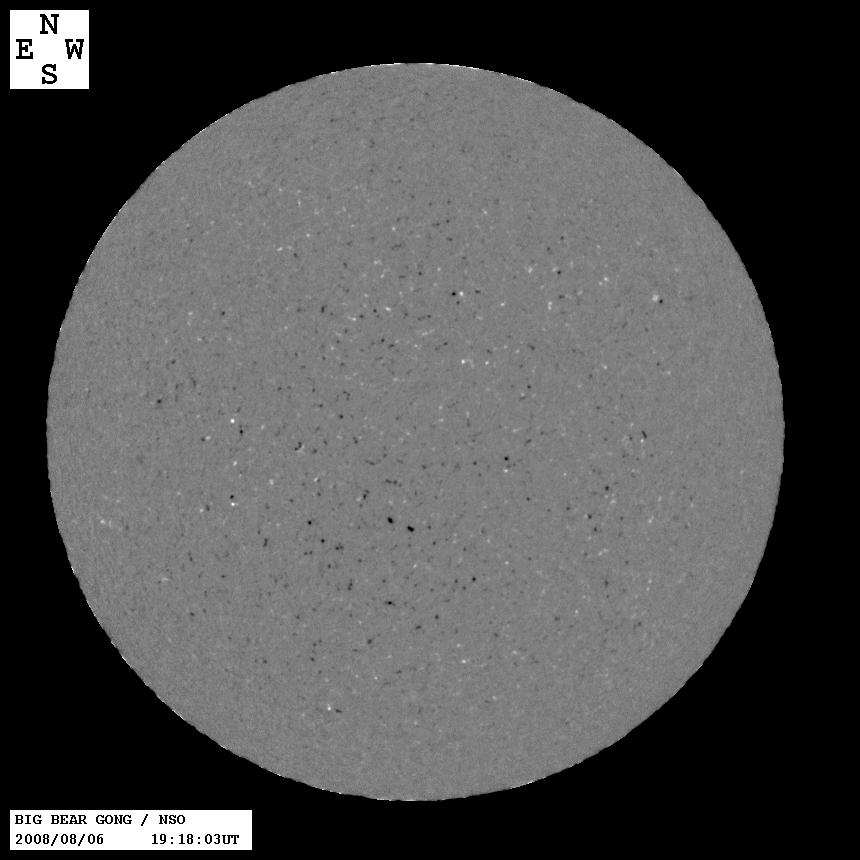

In [180]:
IMAGES[len(IMAGES)-1]

This is the same image after the resize:

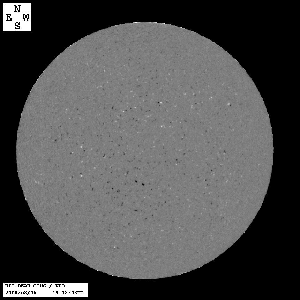

In [181]:
new_image

In [182]:
data=np.array(data)

Our labeled dataset is thus appearing in the following way:

In [183]:
data.shape

(96, 300, 300)

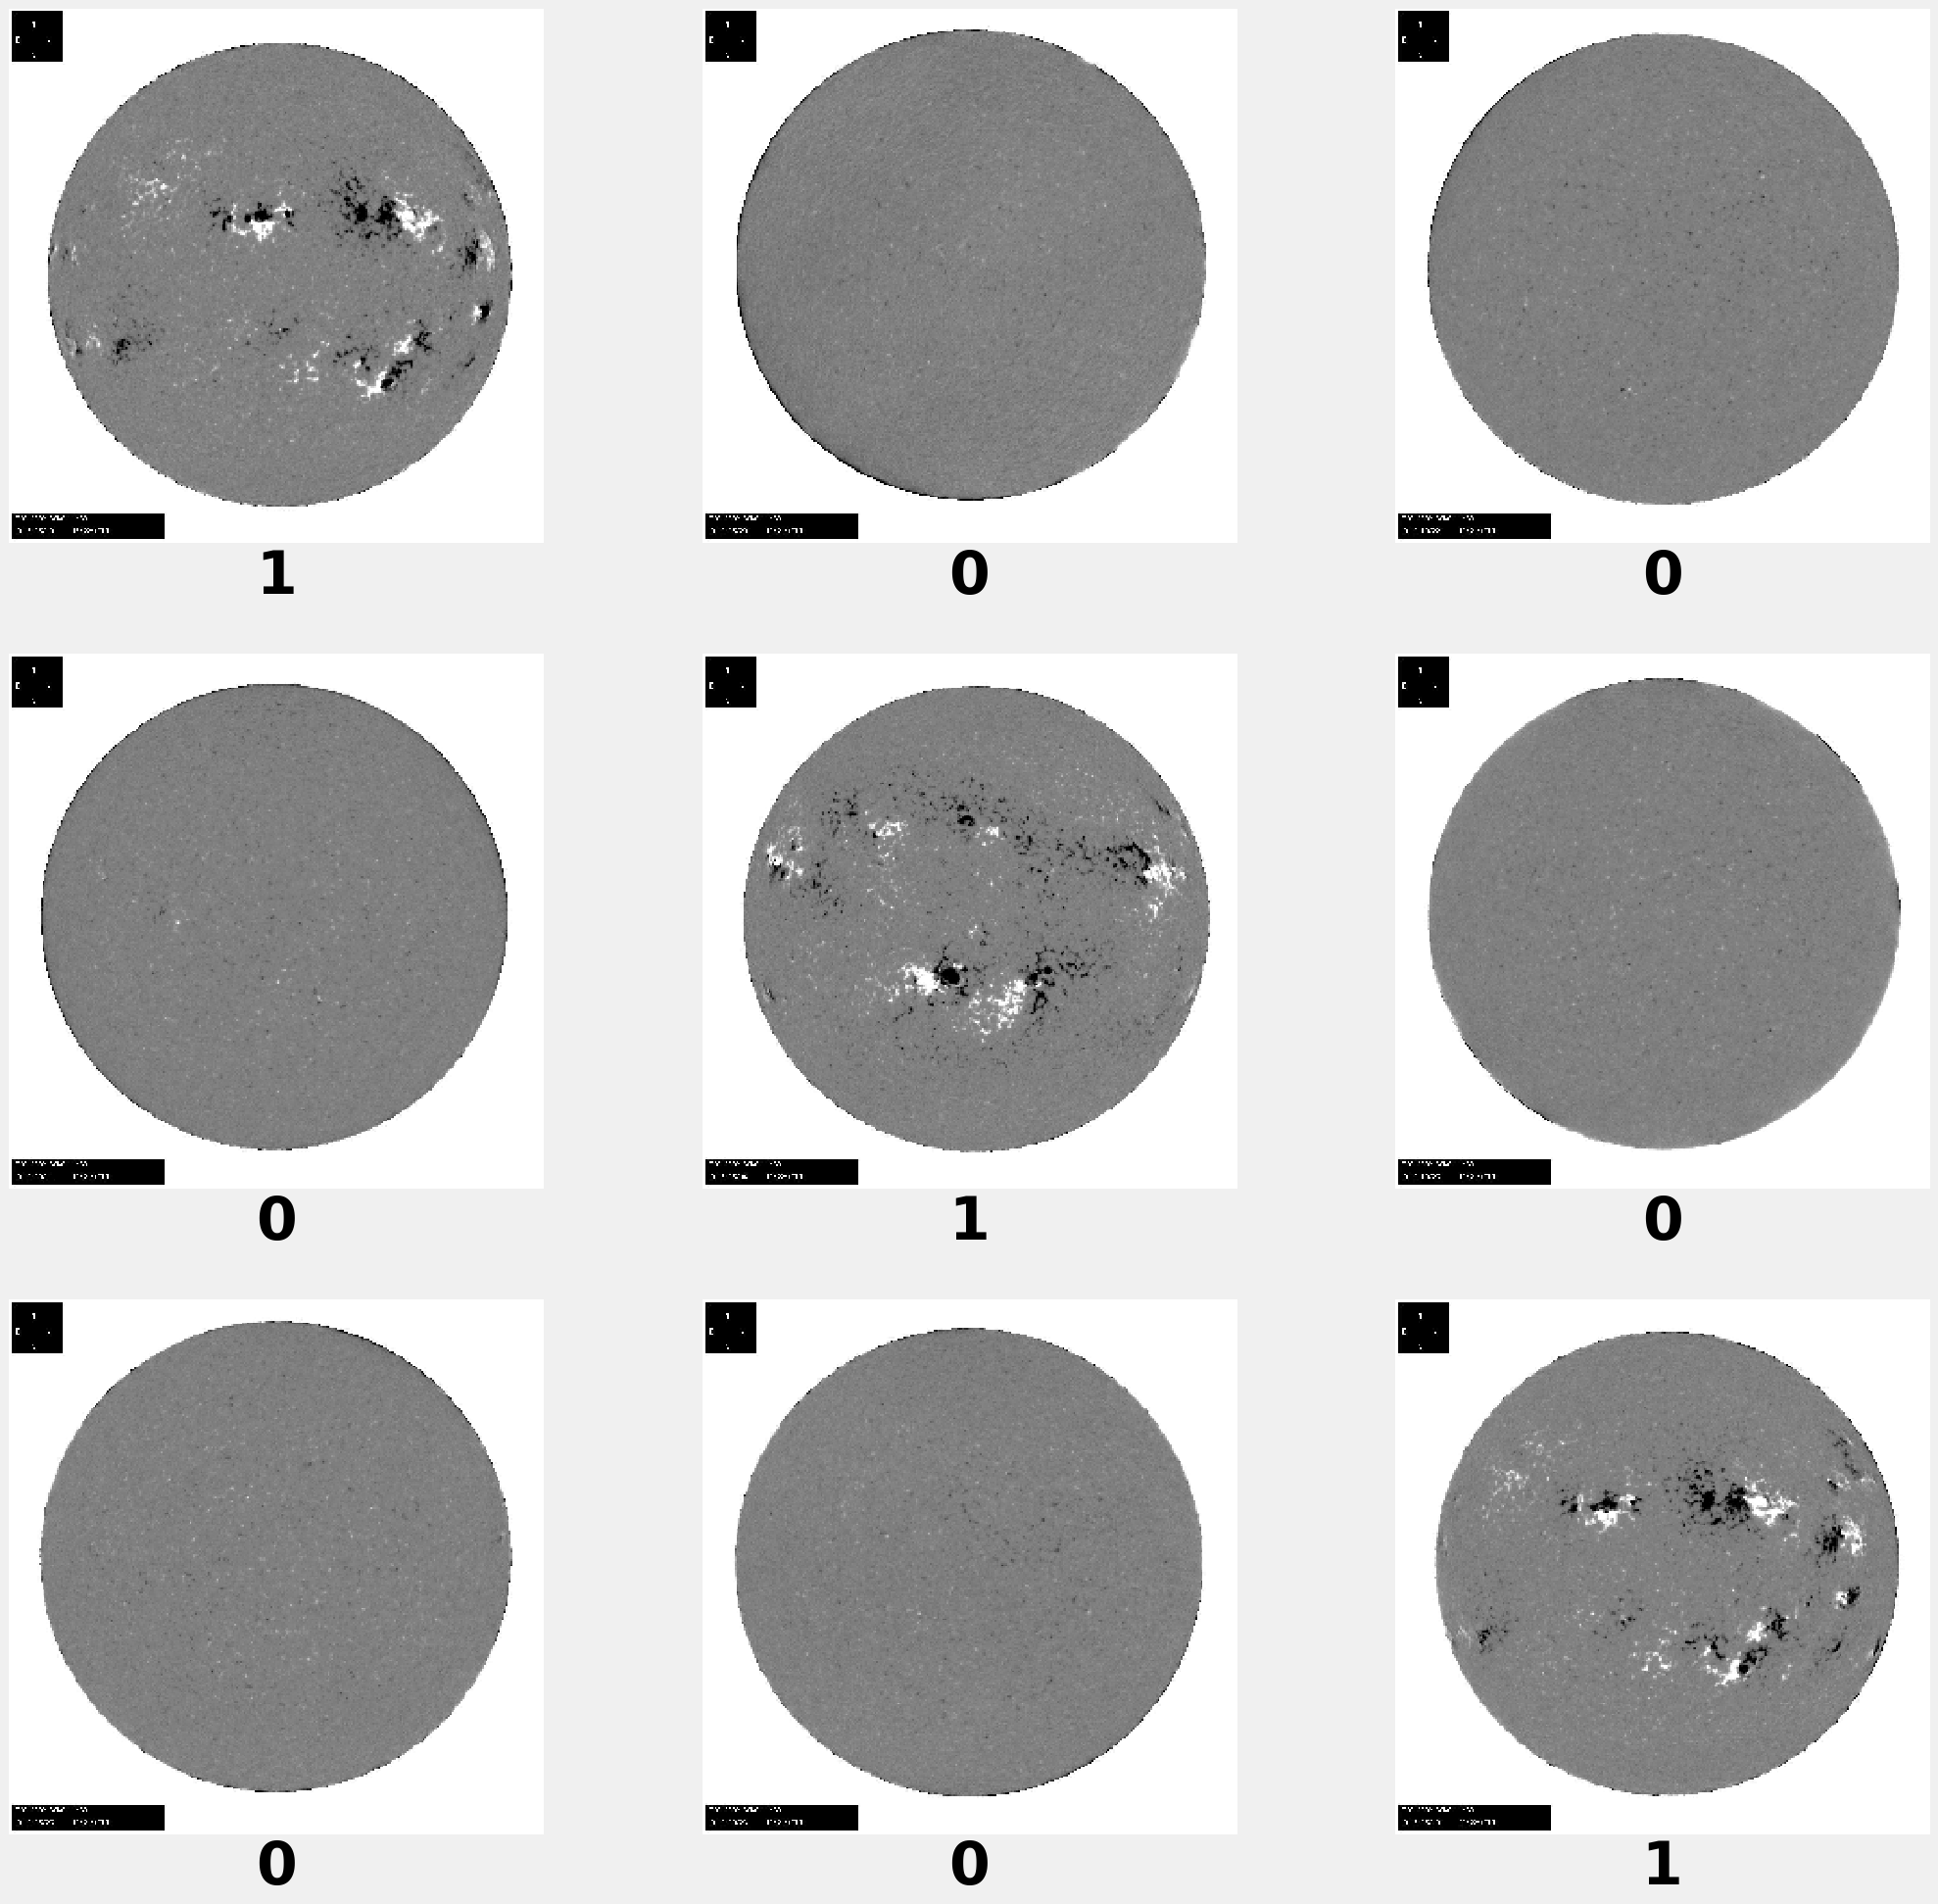

In [184]:
plt.figure(figsize=(32,32))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    x=np.random.randint(60)
    plt.imshow(data[x], cmap=plt.cm.binary)
    plt.xlabel(labels[x], fontsize=60)
plt.show()

As we want to teach the computer how to classify images, we need to make sure that the dataset is good balanced. Fortunately, as we can see from the following plot, this is the case. 

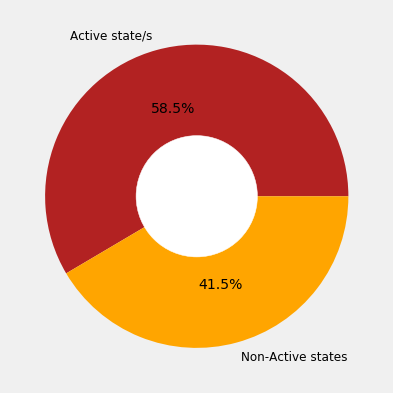

In [13]:
PIE=[62,44]
my_circle=plt.Circle( (0,0), 0.4, color='white')
plt.pie(PIE,autopct='%1.1f%%',labels=['Active state/s','Non-Active states'],colors=['firebrick','Orange'])
p=plt.gcf() 
p.gca().add_artist(my_circle) 
p.set_size_inches(6.5, 6.5)
plt.show()

## 2. Machine Learning

In [302]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(3, (3, 3), input_shape = (size,size, 1), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(3, (3, 3), input_shape = (size,size, 1), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

#classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_263 (Conv2D)          (None, 298, 298, 3)       30        
_________________________________________________________________
max_pooling2d_263 (MaxPoolin (None, 149, 149, 3)       0         
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 147, 147, 3)       84        
_________________________________________________________________
max_pooling2d_264 (MaxPoolin (None, 73, 73, 3)         0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 15987)             0         
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 15988     
Total params: 16,102
Trainable params: 16,102
Non-trainable params: 0
_________________________________________________

In [303]:
train_images, test_images, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.15)
train_images=np.array(train_images)
test_images=np.array(test_images)
train_images, test_images = train_images / 255.0, test_images / 255.0
Train_images=[]
Test_images=[]
for i in range(len(train_images)):
    a=train_images[i].reshape(size,size,1)
    Train_images.append(a)
Train_images=np.array(Train_images)
for j in range(len(test_images)):
    b=test_images[j].reshape(size,size,1)
    Test_images.append(b)
Test_images=np.array(Test_images)
train_images,test_images=Train_images, Test_images
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(train_images, train_labels, epochs=10, 
                validation_data=(test_images, test_labels),batch_size=10)

Train on 81 samples, validate on 15 samples
Epoch 1/10
81/81 [==============================] - 7s 83ms/step - loss: 0.6724 - accuracy: 0.5309 - val_loss: 0.5299 - val_accuracy: 0.6000
Epoch 2/10
81/81 [==============================] - 3s 43ms/step - loss: 0.4787 - accuracy: 0.7531 - val_loss: 0.3708 - val_accuracy: 1.0000
Epoch 3/10
81/81 [==============================] - 4s 45ms/step - loss: 0.3398 - accuracy: 0.9383 - val_loss: 0.2372 - val_accuracy: 1.0000
Epoch 4/10
81/81 [==============================] - 4s 49ms/step - loss: 0.2514 - accuracy: 0.9383 - val_loss: 0.1802 - val_accuracy: 1.0000
Epoch 5/10
81/81 [==============================] - 4s 47ms/step - loss: 0.2027 - accuracy: 0.9506 - val_loss: 0.1442 - val_accuracy: 1.0000
Epoch 6/10
81/81 [==============================] - 4s 44ms/step - loss: 0.1683 - accuracy: 0.9506 - val_loss: 0.0958 - val_accuracy: 1.0000
Epoch 7/10
81/81 [==============================] - 3s 43ms/step - loss: 0.1480 - accuracy: 0.9506 - val_loss:

In [331]:
ACC=[]
for i in range(10):
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Conv2D(3, (3, 3), input_shape = (size,size, 1), activation = 'relu'))

    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(3, (3, 3), input_shape = (size,size, 1), activation = 'relu'))

    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())

    #classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    # Compiling the CNN
    classifier.summary()
    train_images, test_images, train_labels, test_labels = train_test_split(
        data, labels, test_size=0.15)
    train_images=np.array(train_images)
    test_images=np.array(test_images)
    train_images, test_images = train_images / 255.0, test_images / 255.0
    Train_images=[]
    Test_images=[]
    for i in range(len(train_images)):
        a=train_images[i].reshape(size,size,1)
        Train_images.append(a)
    Train_images=np.array(Train_images)
    for j in range(len(test_images)):
        b=test_images[j].reshape(size,size,1)
        Test_images.append(b)
    Test_images=np.array(Test_images)
    train_images,test_images=Train_images, Test_images
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = classifier.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels),batch_size=10)
    ACC.append(history.history['val_accuracy'][len(history.history['val_accuracy'])-1])

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_295 (Conv2D)          (None, 298, 298, 3)       30        
_________________________________________________________________
max_pooling2d_295 (MaxPoolin (None, 149, 149, 3)       0         
_________________________________________________________________
conv2d_296 (Conv2D)          (None, 147, 147, 3)       84        
_________________________________________________________________
max_pooling2d_296 (MaxPoolin (None, 73, 73, 3)         0         
_________________________________________________________________
flatten_64 (Flatten)         (None, 15987)             0         
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 15988     
Total params: 16,102
Trainable params: 16,102
Non-trainable params: 0
_________________________________________________

81/81 [==============================] - 3s 43ms/step - loss: 0.2320 - accuracy: 0.9136 - val_loss: 0.2173 - val_accuracy: 0.9333
Epoch 15/15
81/81 [==============================] - 4s 43ms/step - loss: 0.2068 - accuracy: 0.9506 - val_loss: 0.1943 - val_accuracy: 1.0000
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_305 (Conv2D)          (None, 298, 298, 3)       30        
_________________________________________________________________
max_pooling2d_305 (MaxPoolin (None, 149, 149, 3)       0         
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 147, 147, 3)       84        
_________________________________________________________________
max_pooling2d_306 (MaxPoolin (None, 73, 73, 3)         0         
_________________________________________________________________
flatten_69 (Flatten)         (None, 15987)   

Epoch 2/15
81/81 [==============================] - 4s 50ms/step - loss: 0.6659 - accuracy: 0.5802 - val_loss: 0.6476 - val_accuracy: 0.6000
Epoch 3/15
81/81 [==============================] - 4s 46ms/step - loss: 0.6276 - accuracy: 0.5802 - val_loss: 0.6143 - val_accuracy: 0.6000
Epoch 4/15
81/81 [==============================] - 4s 44ms/step - loss: 0.5747 - accuracy: 0.6790 - val_loss: 0.5650 - val_accuracy: 0.6667
Epoch 5/15
81/81 [==============================] - 4s 44ms/step - loss: 0.4952 - accuracy: 0.8889 - val_loss: 0.5001 - val_accuracy: 0.8000
Epoch 6/15
81/81 [==============================] - 4s 44ms/step - loss: 0.4130 - accuracy: 0.8395 - val_loss: 0.4313 - val_accuracy: 0.8667
Epoch 7/15
81/81 [==============================] - 4s 47ms/step - loss: 0.3135 - accuracy: 0.9383 - val_loss: 0.3685 - val_accuracy: 0.8667
Epoch 8/15
81/81 [==============================] - 4s 48ms/step - loss: 0.2222 - accuracy: 0.9383 - val_loss: 0.2913 - val_accuracy: 0.8667
Epoch 9/15
81

81/81 [==============================] - 4s 45ms/step - loss: 0.1542 - accuracy: 0.9383 - val_loss: 0.1012 - val_accuracy: 1.0000
Epoch 14/15
81/81 [==============================] - 4s 45ms/step - loss: 0.1488 - accuracy: 0.9383 - val_loss: 0.1325 - val_accuracy: 1.0000
Epoch 15/15
81/81 [==============================] - 4s 44ms/step - loss: 0.1327 - accuracy: 0.9877 - val_loss: 0.0809 - val_accuracy: 1.0000


In [334]:
print("L'accuracy raggiunta dal modello è: %.3f" %(acc))

L'accuracy raggiunta dal modello è: 0.947
